<a href="https://colab.research.google.com/github/sunnyiisc/Single-Phase-Inverter-12VDC-to-240VAC-50Hz/blob/main/Single_Phase_Inverter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sinusoidal PWM Signal

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

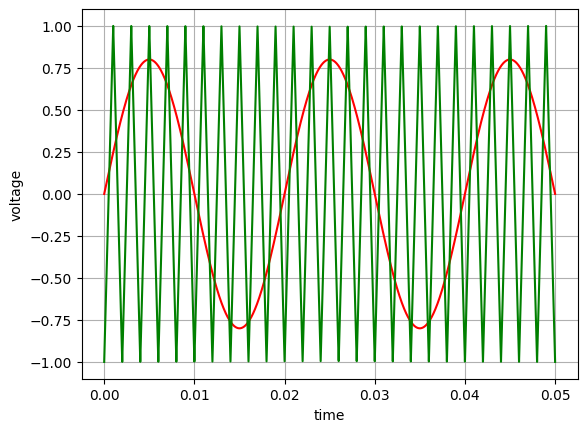

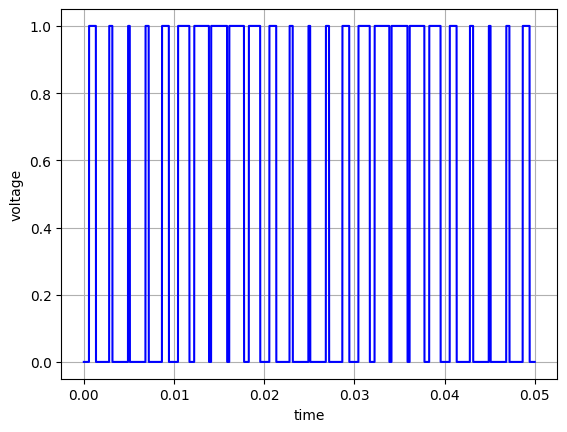

In [ ]:
# Constants
fm = 50
fc = 500
m = 0.8

tran = 50e-3

# Transient time
t = np.linspace(0, tran, num=10000)

# Modulating Signal
xm = m * np.sin(2*math.pi*fm*t)

# Carrier Signal
xc = sig.sawtooth(2*math.pi*fc*t, width=0.5)

# PWM signal
x_pwm = xm < xc

# Plotting
plt.plot(t, xm, 'r')
plt.plot(t, xc, 'g')
plt.xlabel('time')
plt.ylabel('voltage')
plt.grid()
plt.show()

plt.plot(t, x_pwm, 'b')
plt.xlabel('time')
plt.ylabel('voltage')
plt.grid()
plt.show()

## Implementaion of SPWM

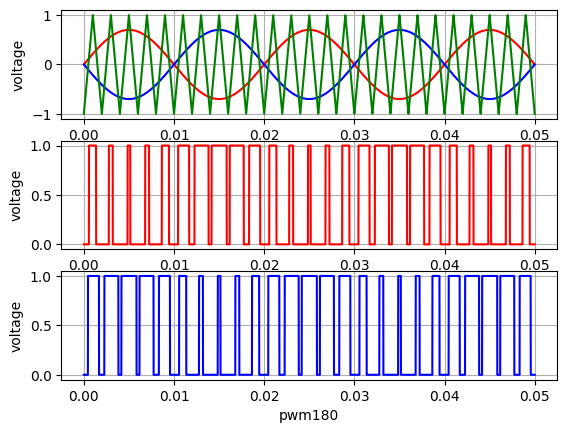

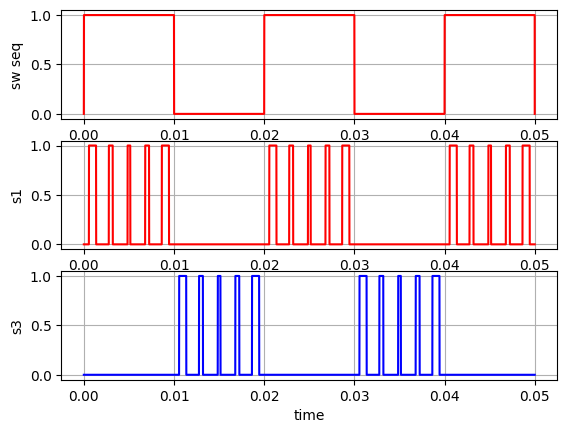

In [22]:
# Constants
fm = 50
fc = 500
m = 0.7

tran = 50e-3

# Transient time
t = np.linspace(0, tran, num=10000)

# Modulating Signal
xm = m * np.sin(2*math.pi*fm*t)
xm180 = m * np.sin(2*math.pi*fm*t - math.pi)

# Carrier Signal
xc = sig.sawtooth(2*math.pi*fc*t, width=0.5)

# Switching Sequence
xs = xm > 0

# PWM signal
x_pwm = xm < xc
x_pwm180 = xm180 < xc

# Final Switch Signals
s1 = x_pwm * np.multiply(xs, 1)
s3 = x_pwm180 * np.multiply(np.invert(xs), 1)

# Plotting
plt.subplot(3,1,1)
plt.plot(t, xm, 'r', t, xm180, 'b')
plt.plot(t, xc, 'g')
plt.xlabel('time')
plt.ylabel('voltage')
plt.grid()

plt.subplot(3,1,2)
plt.plot(t, x_pwm, 'r')
plt.xlabel('pwm')
plt.ylabel('voltage')
plt.grid()

plt.subplot(3,1,3)
plt.plot(t, x_pwm180, 'b')
plt.xlabel('pwm180')
plt.ylabel('voltage')
plt.grid()
plt.show()


plt.subplot(3,1,1)
plt.plot(t, xs, 'r')
plt.xlabel('time')
plt.ylabel('sw seq')
plt.grid()

plt.subplot(3,1,2)
plt.plot(t, s1, 'r')
plt.xlabel('time')
plt.ylabel('s1')
plt.grid()

plt.subplot(3,1,3)
plt.plot(t, s3, 'b')
plt.xlabel('time')
plt.ylabel('s3')
plt.grid()
plt.show()